In [ ]:
#  cosas de señales (a partir de ahora seniales)
# Librerías principales para señales y sistemas
import numpy as np              # Para manejo de arreglos y funciones matemáticas
import matplotlib.pyplot as plt # Para graficar funciones continuas y discretas
from scipy import signal       # Para manipulación de señales (útil en la materia)
import sympy as sp
from scipy.interpolate import interp1d
from scipy.io import wavfile

# Opcional: para mostrar gráficos en Jupyter Notebook
# %matplotlib inline

#agranda los ejes globalmente
#plt.rcParams['xtick.labelsize'] = 20
#plt.rcParams['ytick.labelsize'] = 20

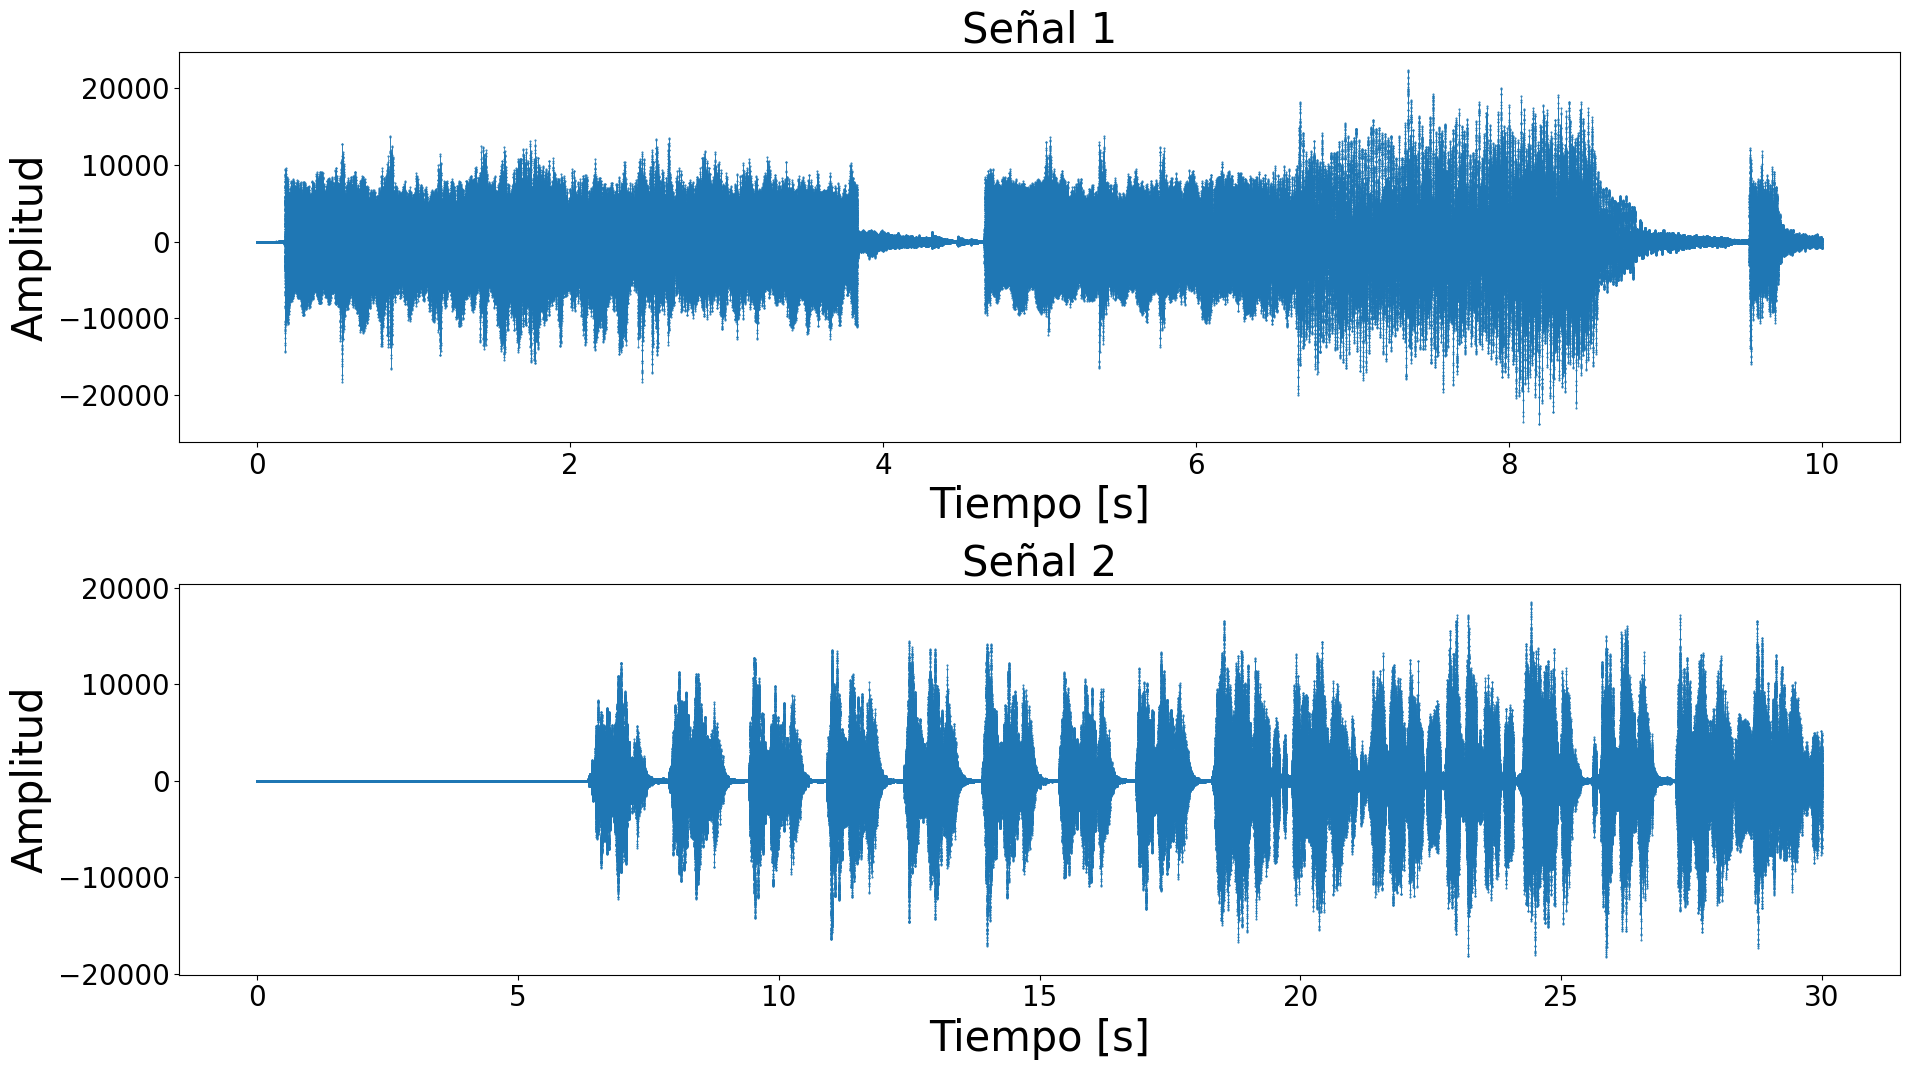

44100 hz
48000 hz


In [68]:


# Leer los archivos WAV
fs1, data1 = wavfile.read("cancion1.wav")
fs2, data2 = wavfile.read("cancion2.wav")

# Crear eje temporal
t1 = np.arange(len(data1)) / fs1
t2 = np.arange(len(data2)) / fs2

# Graficar
plt.figure(figsize=(19.20, 10.80))

plt.subplot(2,1,1)
plt.scatter(t1, data1,s=0.25)
plt.vlines(t1, 0, data1, color='C0', linewidth=0.5)
plt.title("Señal 1", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)

plt.subplot(2,1,2)
plt.plot()
plt.scatter(t2, data2, s=0.25)
plt.vlines(t2, 0, data2, color='C0', linewidth=0.5)
plt.title("Señal 2", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)

plt.tight_layout()
plt.savefig("grafico_señales_en_tiempo")

plt.show()


print(fs1, "hz")
print(fs2, "hz")



la frecuencia la sacamos de la libreria xd


$g1 = 44100hz$

$g2 = 48000hz$


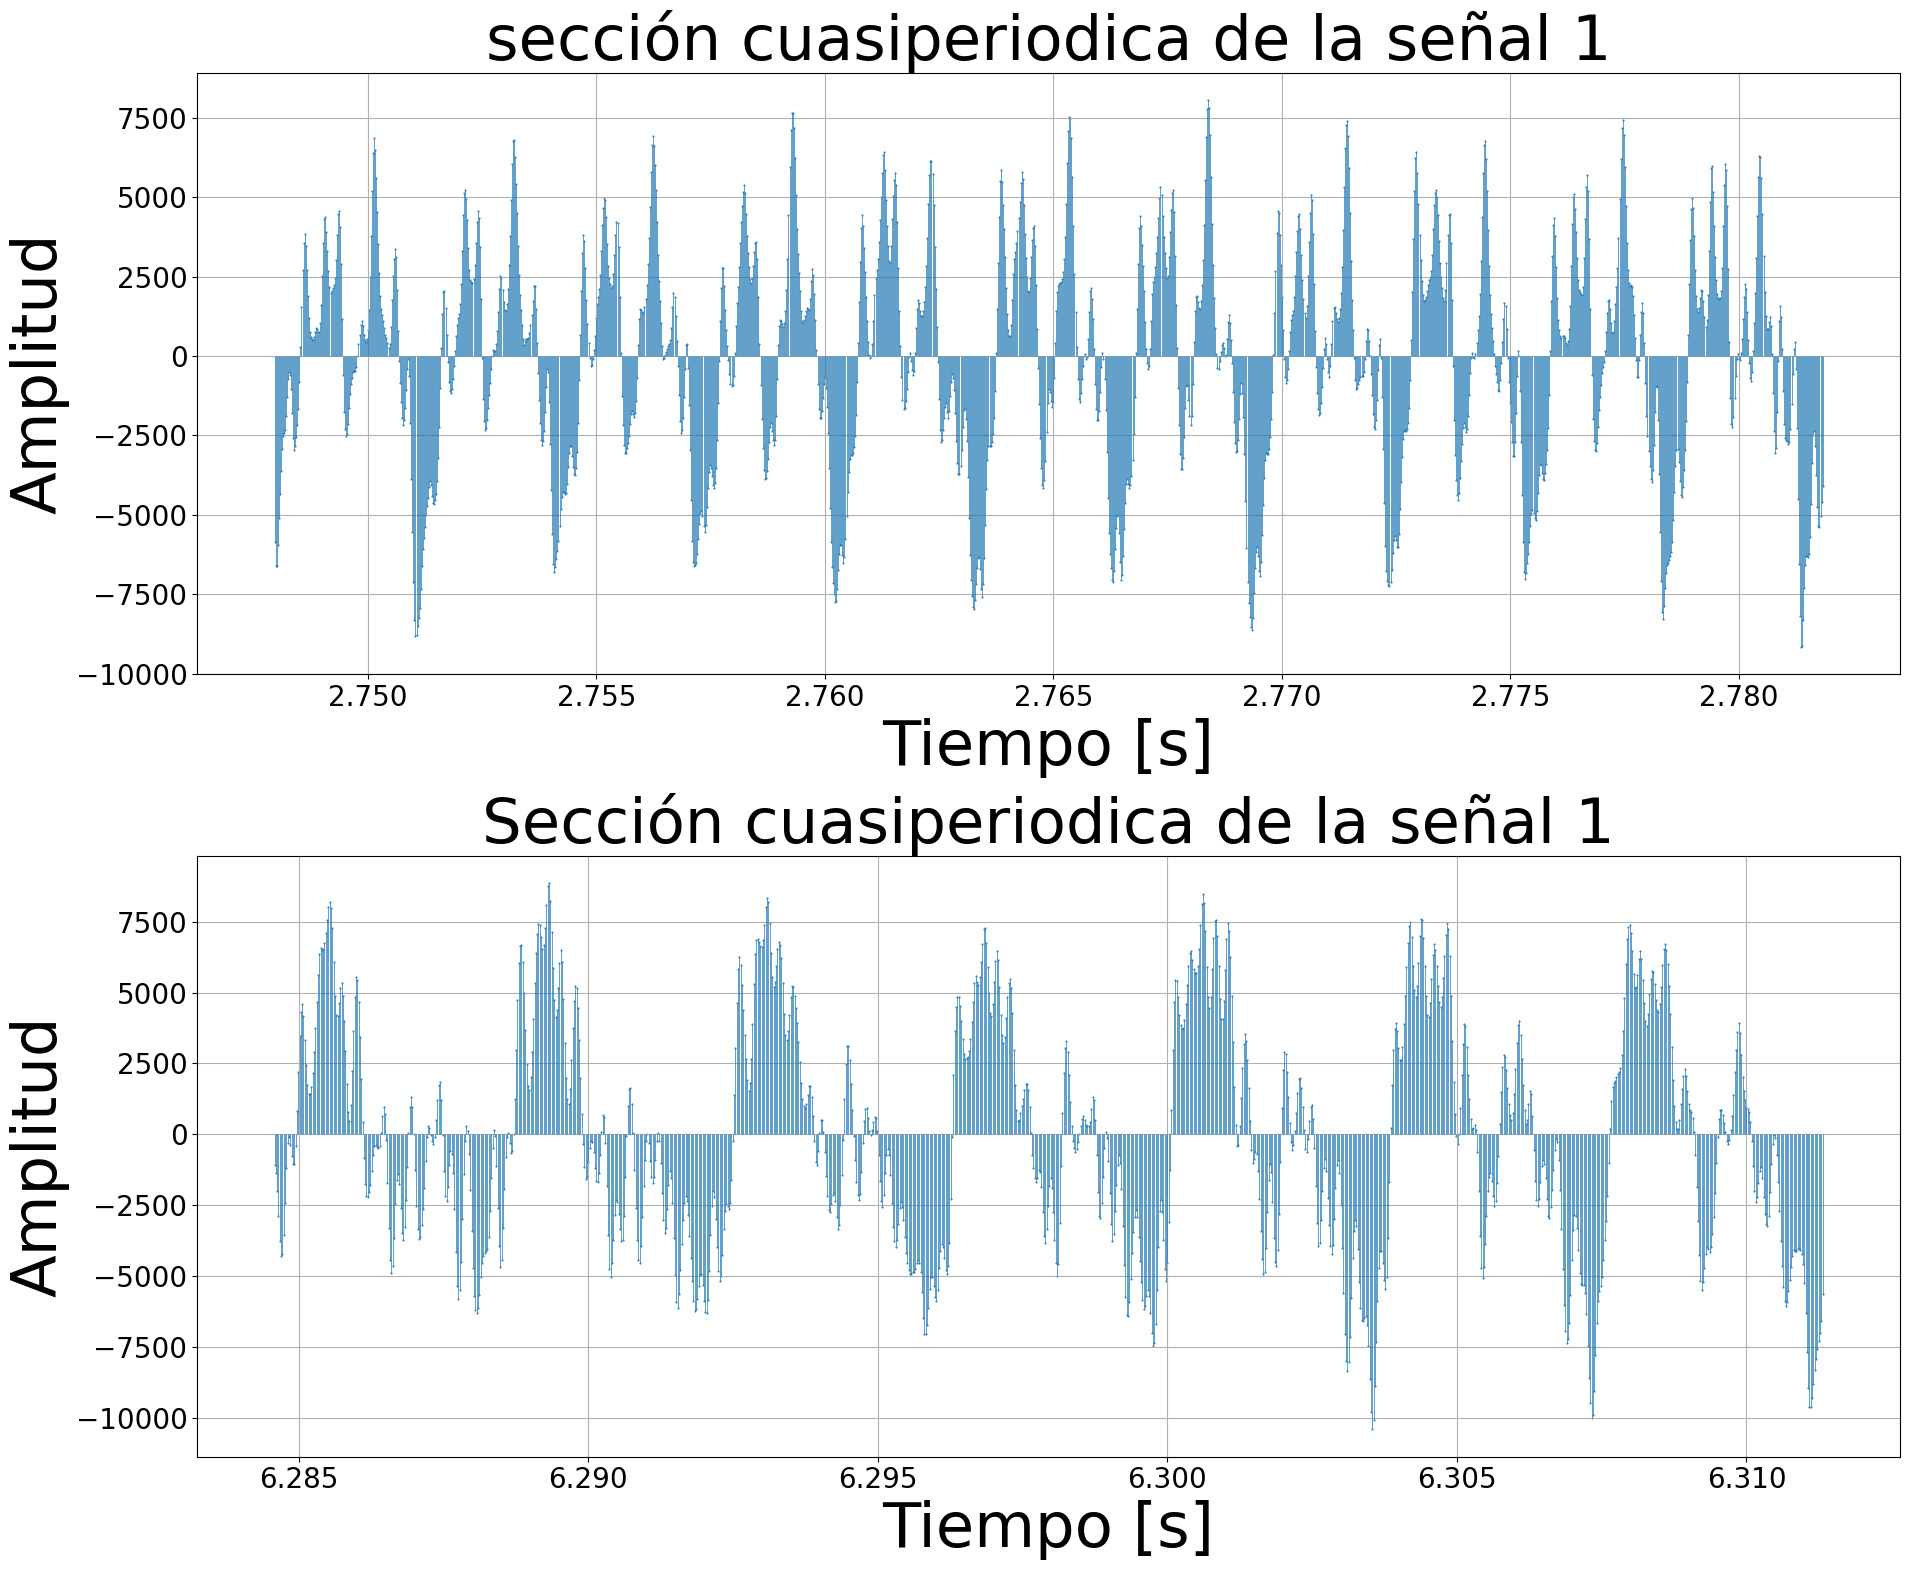

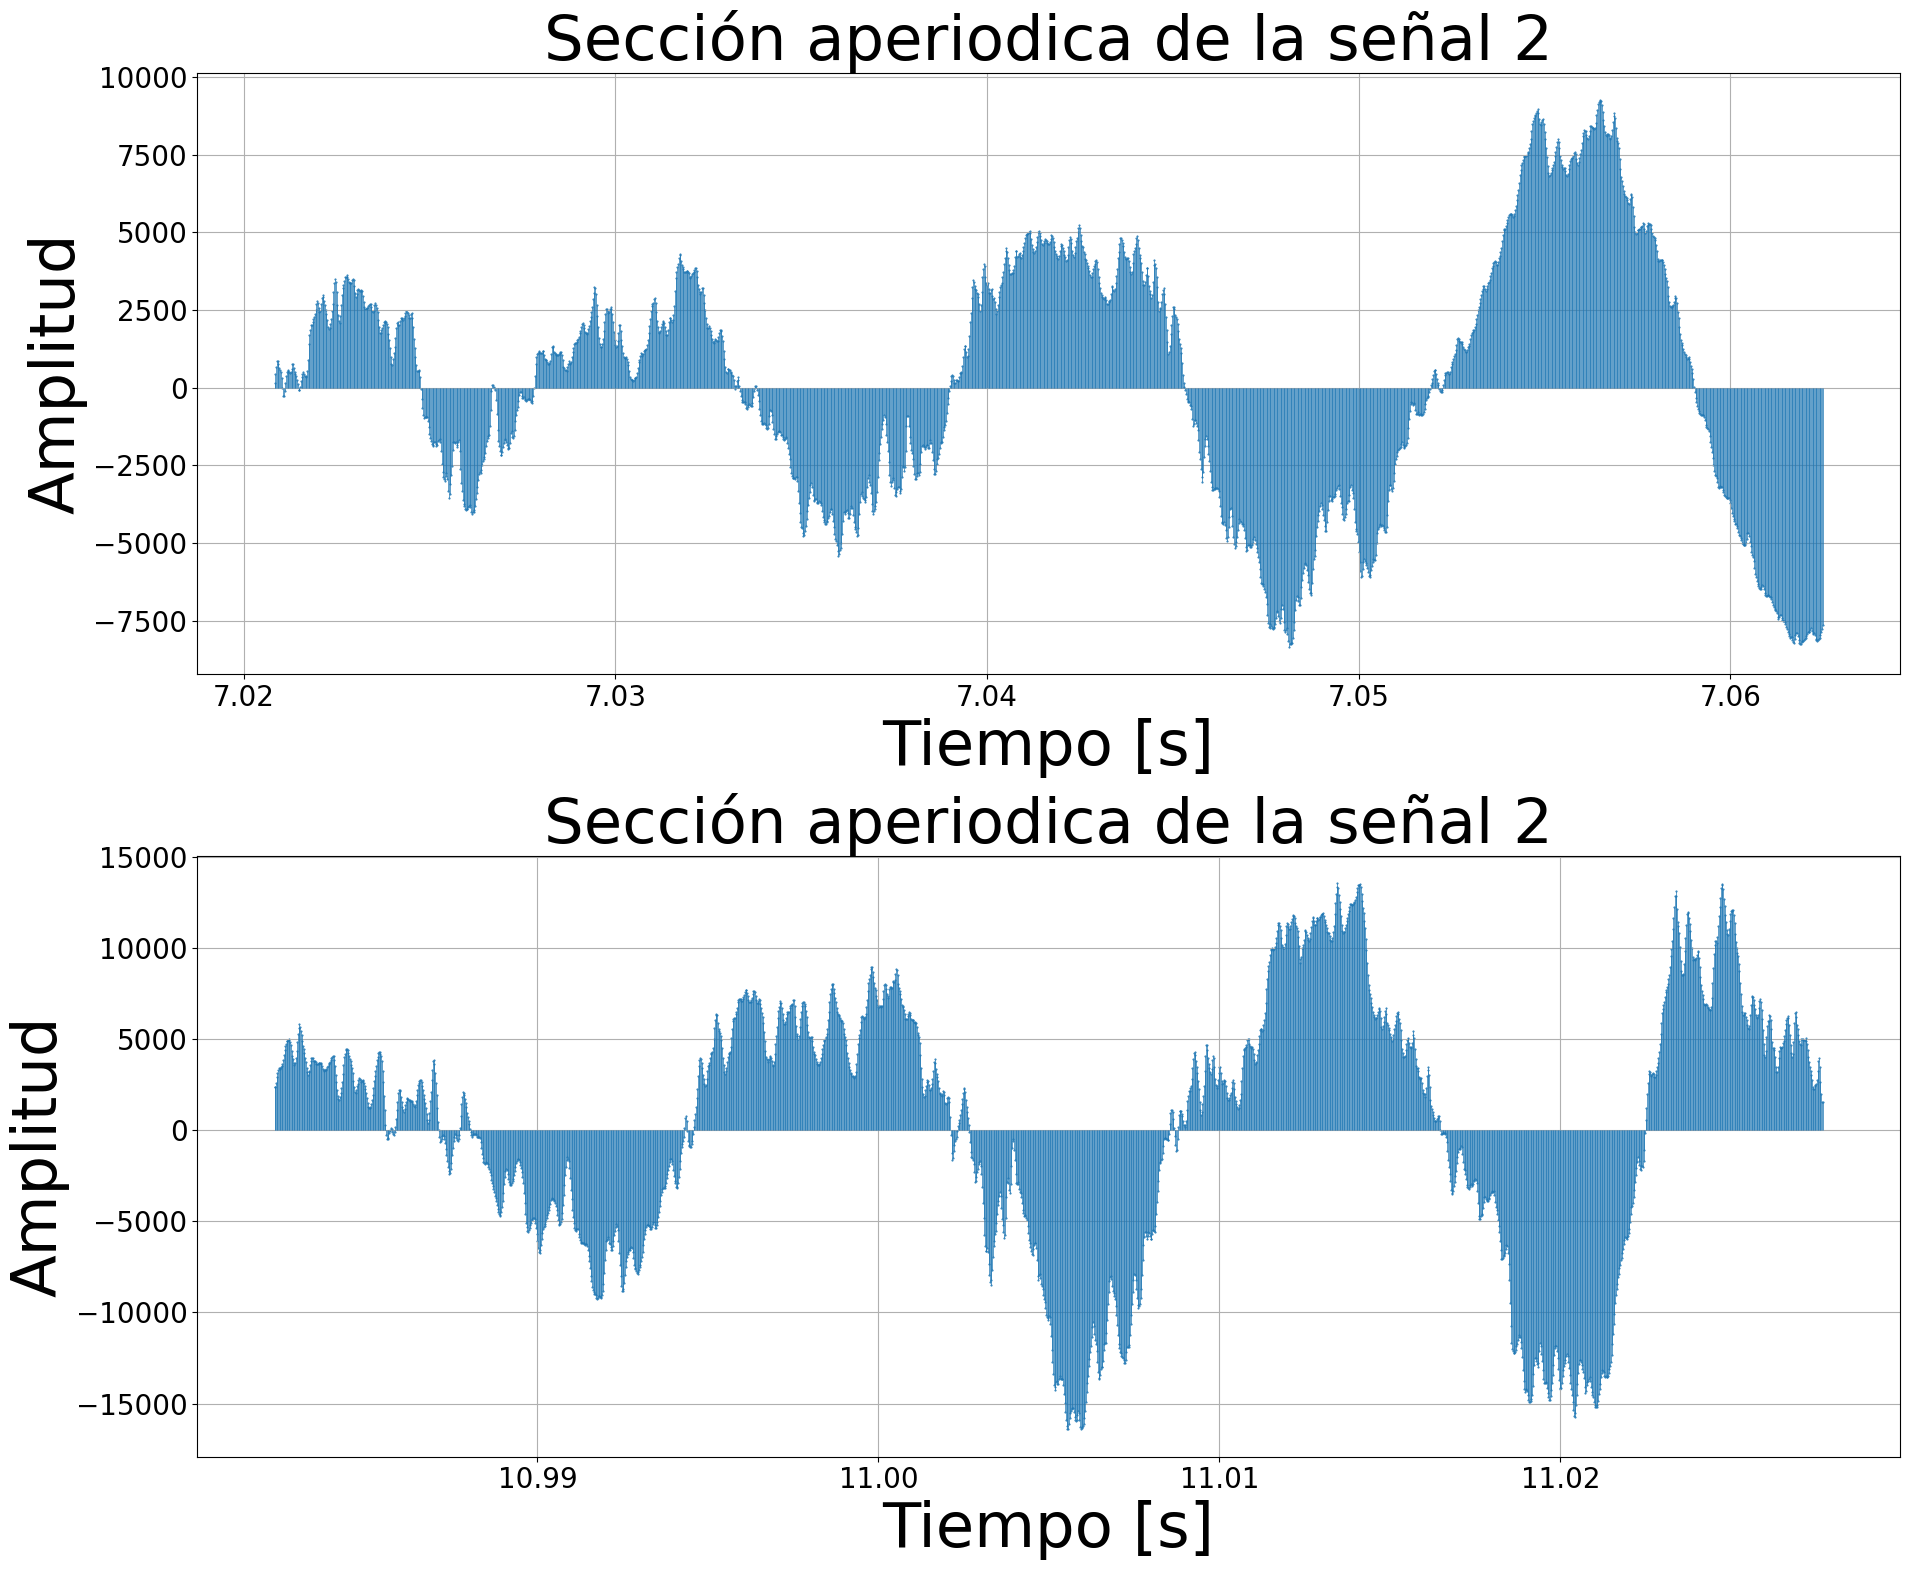

324.4816053511706 hz
261.6101694915254 hz


In [62]:


# Crear eje temporal
t1 = np.arange(len(data1)) / fs1
t2 = np.arange(len(data2)) / fs2



start = 121185
end = 122680

# Graficar
plt.figure(figsize=(19.2, 15.8))

plt.subplot(2,1,1)
plt.scatter(t1[start:end], data1[start:end],s=0.25)
plt.vlines(t1[start:end], 0, data1[start:end], color='C0', linewidth=0.5)
#plt.plot(t1[start:end], data1[start:end], color='C0')
plt.title("sección cuasiperiodica de la señal 1", fontsize=45)
plt.xlabel("Tiempo [s]", fontsize=45)
plt.ylabel("Amplitud", fontsize=45)
plt.grid(True)



start2 =  277150
end2 = 278330

plt.subplot(2,1,2)
#plt.plot(t1[start2:end2], data1[start2:end2], color='C0')
plt.scatter(t1[start2:end2], data1[start2:end2],s=0.25)
plt.vlines(t1[start2:end2], 0, data1[start2:end2], color='C0', linewidth=0.5)
plt.title("Sección cuasiperiodica de la señal 1", fontsize=45)
plt.xlabel("Tiempo [s]", fontsize=45)
plt.ylabel("Amplitud", fontsize=45)
plt.grid(True)

plt.tight_layout()

plt.savefig("primer grafico")
plt.show()

plt.figure(figsize=(19.2, 15.8))


plt.subplot(2,1,1)

start3 = 337000
end3 = 339000

#plt.plot(t2[start3:end3], data2[start3:end3], color='C0')
plt.scatter(t2[start3:end3], data2[start3:end3],s=0.25)
plt.vlines(t2[start3:end3], 0, data2[start3:end3], color='C0', linewidth=0.5)
plt.title("Sección aperiodica de la señal 2", fontsize=45)
plt.xlabel("Tiempo [s]", fontsize=45)
plt.ylabel("Amplitud", fontsize=45)
plt.grid(True)


plt.subplot(2,1,2)

start4 = 527150
end4 = 529330

#plt.plot(t2[start4:end4], data2[start4:end4], color='C0')
plt.scatter(t2[start4:end4], data2[start4:end4],s=0.25)
plt.vlines(t2[start4:end4], 0, data2[start4:end4], color='C0', linewidth=0.5)
plt.title("Sección aperiodica de la señal 2", fontsize=45)
plt.xlabel("Tiempo [s]", fontsize=45)
plt.ylabel("Amplitud", fontsize=45)
plt.grid(True)


plt.tight_layout()



plt.savefig("primer segundo")
plt.show()

print(1/((end - start)/(44100*11)), 'hz')

print(1/((end2 - start2)/(44100*7)), 'hz')



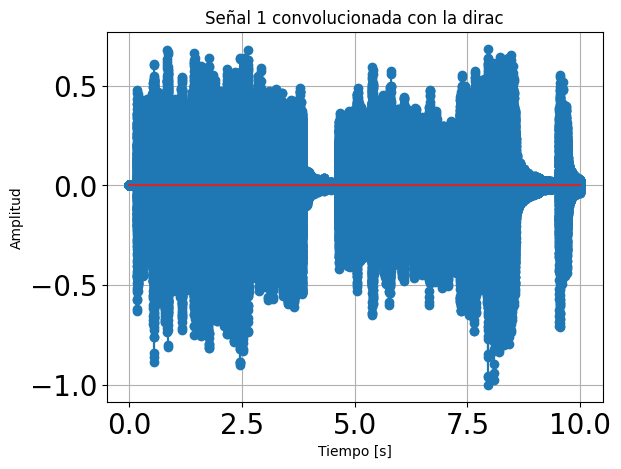

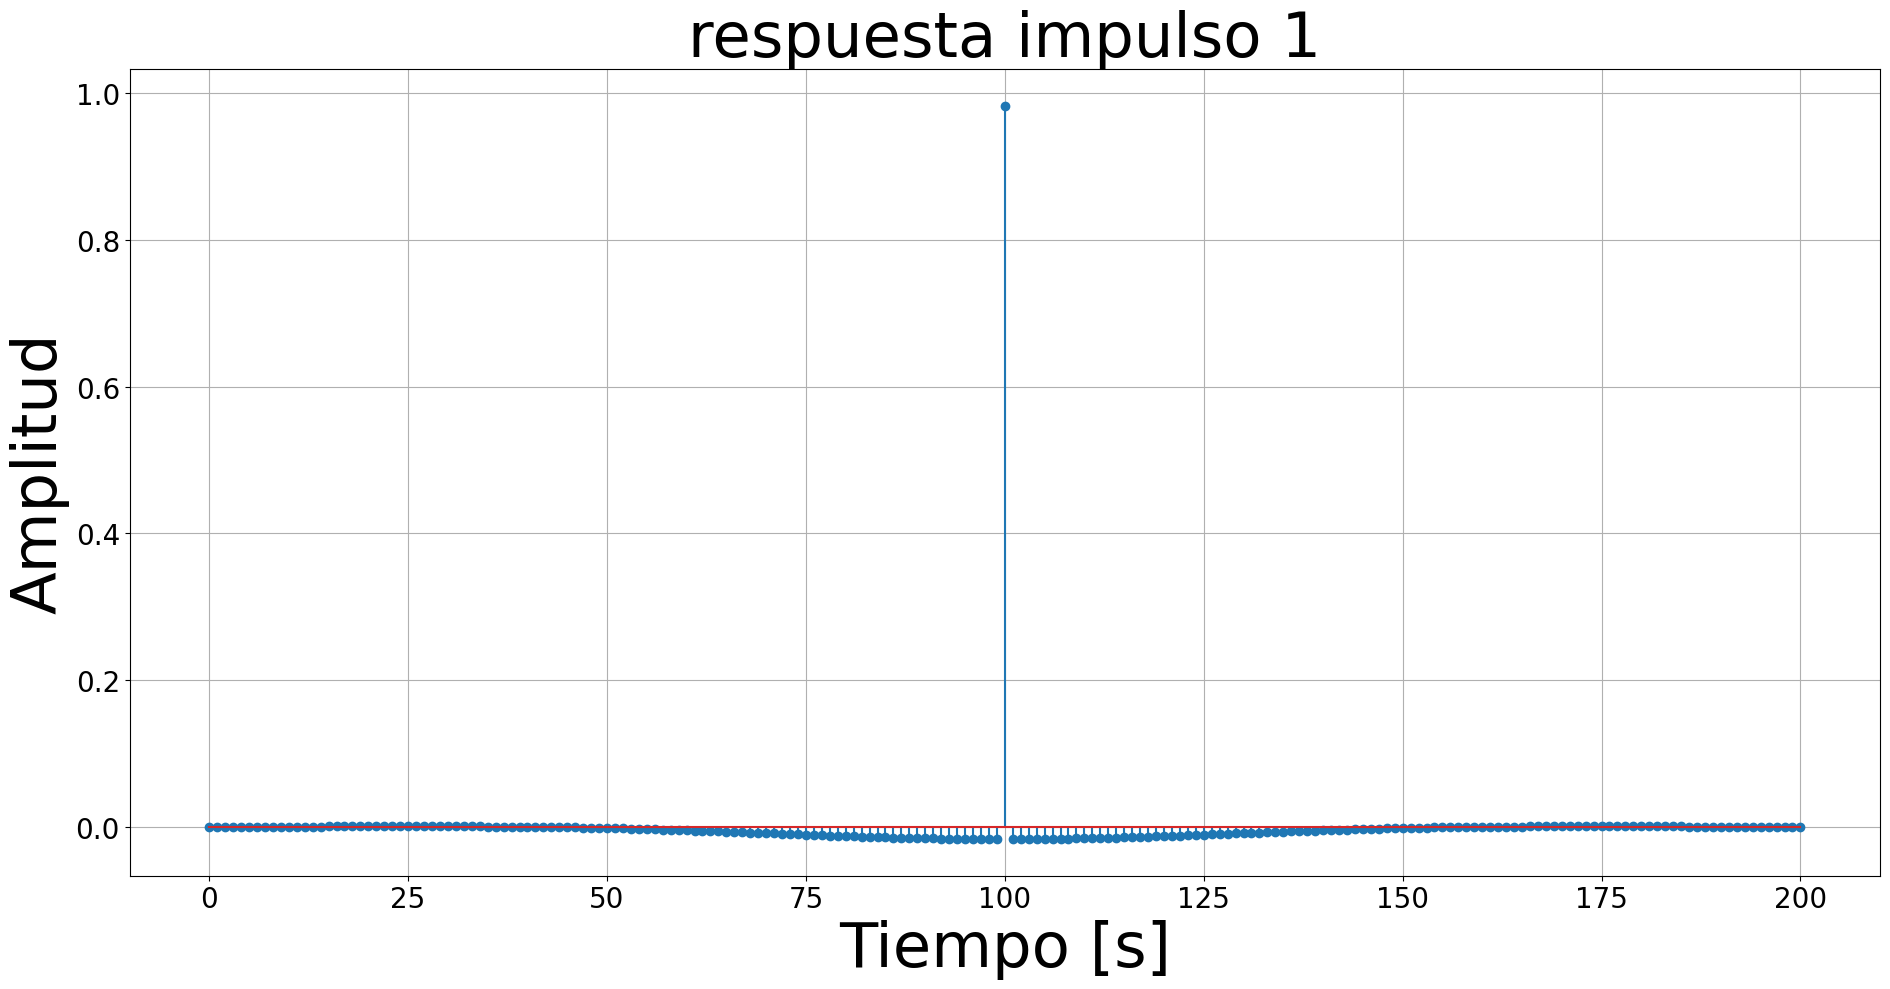

In [63]:

respuesta1 = np.loadtxt("respuesta_impulso_1.txt")
n = np.arange(len(respuesta1))
y = np.convolve(data1, respuesta1, mode='full')  


y_norm = y / np.max(np.abs(y))  # Normaliza entre -1 y 1
y_int16 = np.int16(y_norm * 32767)  # Convierte a int16
ylen = np.arange(len(y))/fs1
wavfile.write("convolucion_resultado1_imp1.wav", fs1, y_int16)


plt.figure()
#plt.plot(ylen, y_norm)
plt.stem(ylen, y_norm)
plt.title("Señal 1 convolucionada con la dirac")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.figure(figsize=(19,10))
#plt.plot(n, respuesta1)
plt.stem(n,respuesta1)
plt.title("respuesta impulso 1", fontsize=45)
plt.xlabel("Tiempo [s]", fontsize=45)
plt.ylabel("Amplitud", fontsize=45)
plt.grid(True)


plt.tight_layout()
plt.savefig("respuesta_impulso_1")

plt.show()




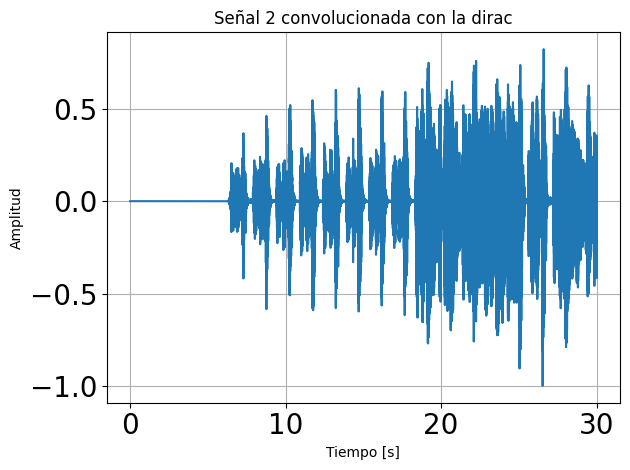

In [64]:
z = np.convolve(data2, respuesta1, mode='full')  


z_norm = z / np.max(np.abs(z))  # Normaliza entre -1 y 1
z_int16 = np.int16(z_norm * 32767)  # Convierte a int16
zlen = np.arange(len(z)) / fs2

# Guardar como archivo WAV (usa la misma frecuencia de muestreo que el original)
wavfile.write("convolucion_resultado2_imp1.wav", fs2, z_int16)

plt.figure()
plt.plot(zlen, z_norm)
plt.title("Señal 2 convolucionada con la dirac")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)


plt.tight_layout()
plt.show()




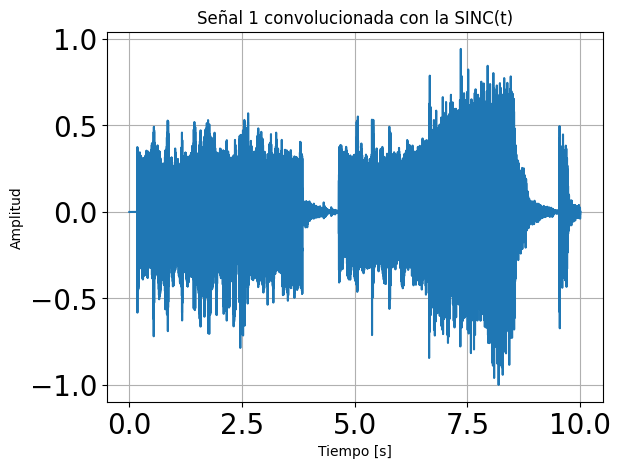

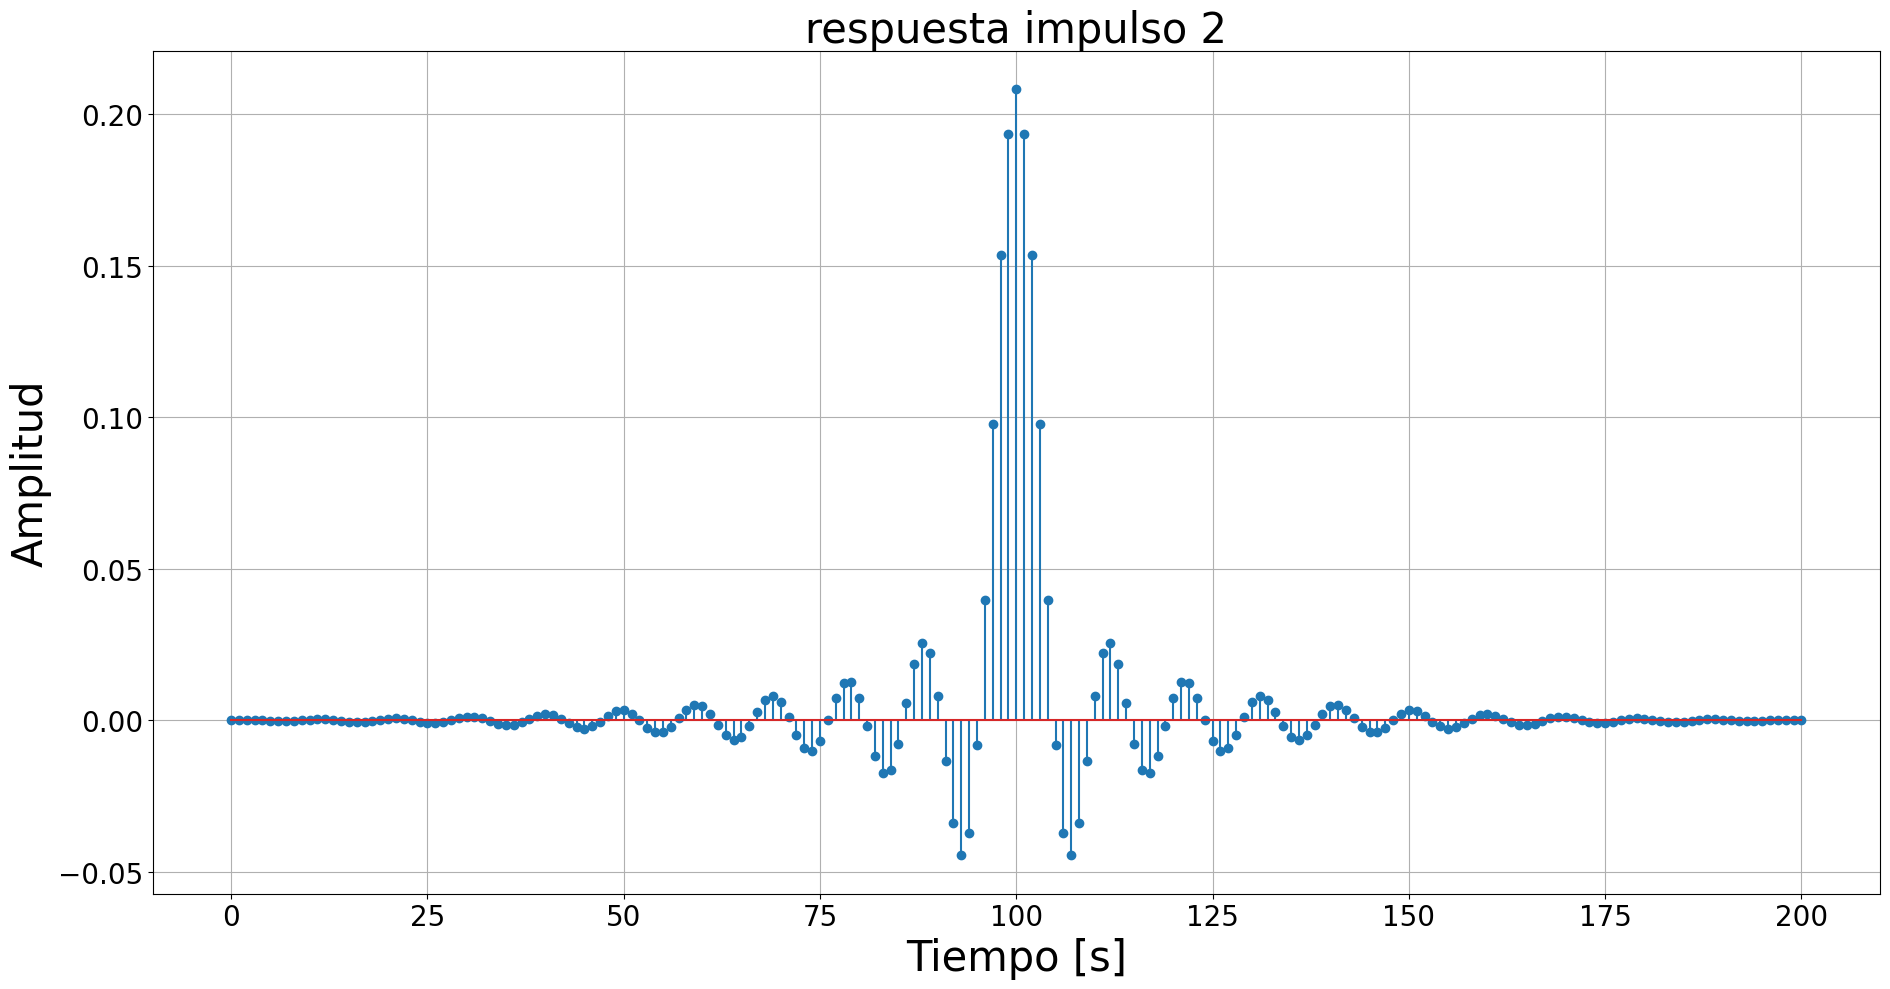

In [65]:
respuesta2 = np.loadtxt("respuesta_impulso_2.txt")
m = np.arange(len(respuesta2))
y = np.convolve(data1, respuesta2, mode='full') 


y_norm = y / np.max(np.abs(y))  # Normaliza entre -1 y 1
y_int16 = np.int16(y_norm * 32767)  # Convierte a int16
ylen = np.arange(len(y))/fs1
wavfile.write("convolucion_resultado1_imp2.wav", fs1, y_int16)

plt.figure()
plt.plot(ylen, y_norm)
plt.title("Señal 1 convolucionada con la SINC(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)


plt.figure(figsize= (19,10))
plt.stem(m, respuesta2)
plt.title("respuesta impulso 2", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)
plt.grid(True)
plt.savefig("respuesta_impulso_2")


plt.tight_layout()
plt.show()



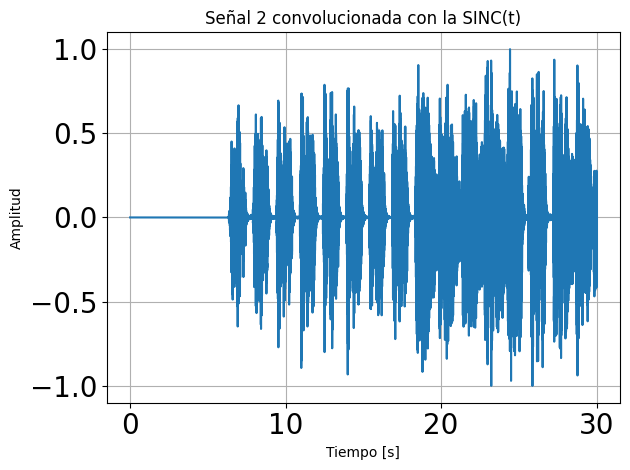

In [66]:
z = np.convolve(data2, respuesta2, mode='full')  
zlen = np.arange(len(z)) / fs2

z_norm = z / np.max(np.abs(z))  # Normaliza entre -1 y 1
z_int16 = np.int16(z_norm * 32767)  # Convierte a int16

plt.figure()
plt.plot(zlen, z_norm)
plt.title("Señal 2 convolucionada con la SINC(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)


plt.tight_layout()
plt.show()

# Guardar como archivo WAV (usa la misma frecuencia de muestreo que el original)
wavfile.write("convolucion_resultado2_imp2.wav", fs2, z_int16)



C:\Users\felip\AppData\Local\Temp\ipykernel_19900\3549124567.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fsv, datav = wavfile.read("violin.wav")


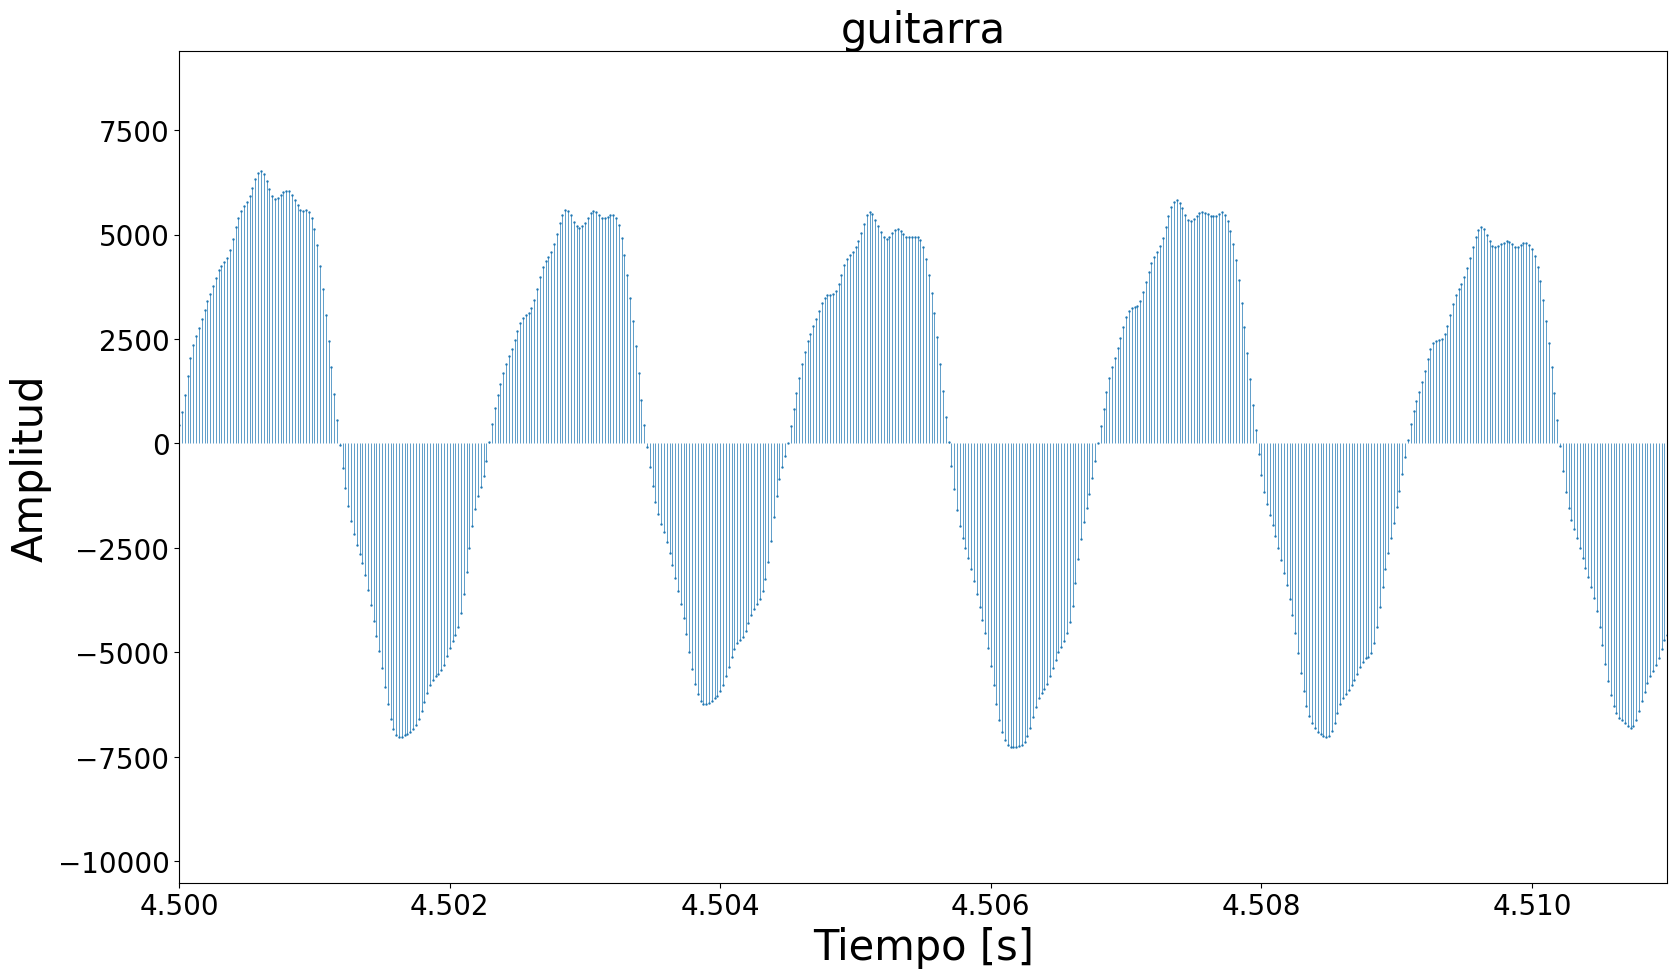

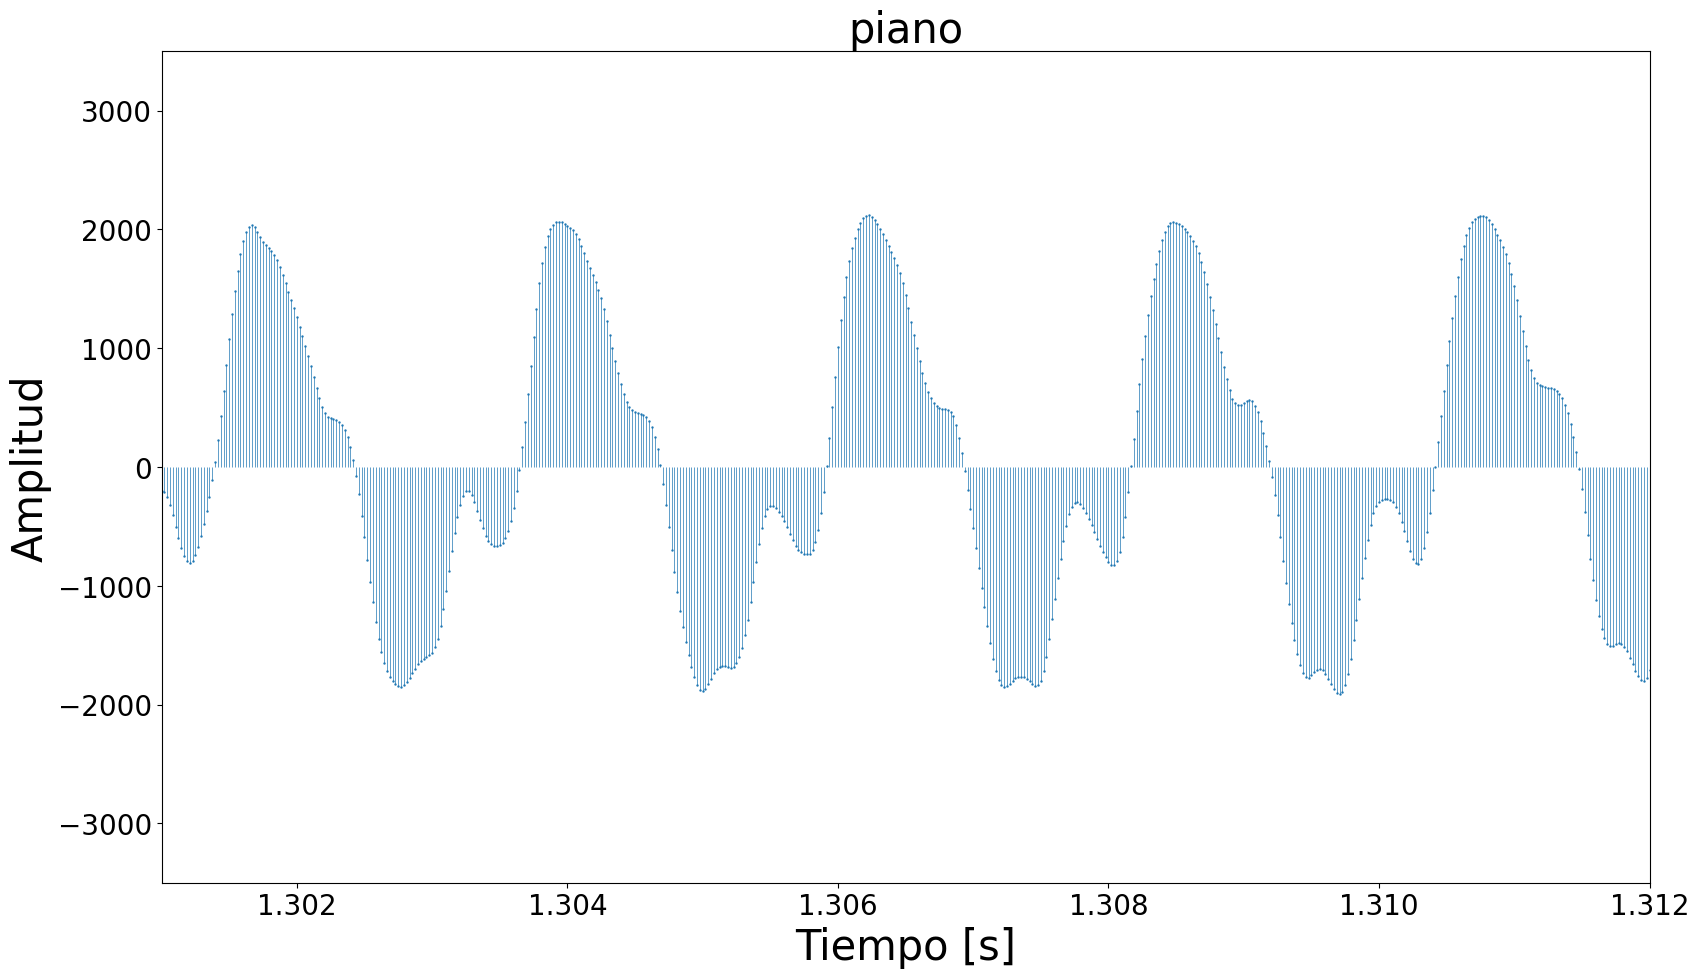

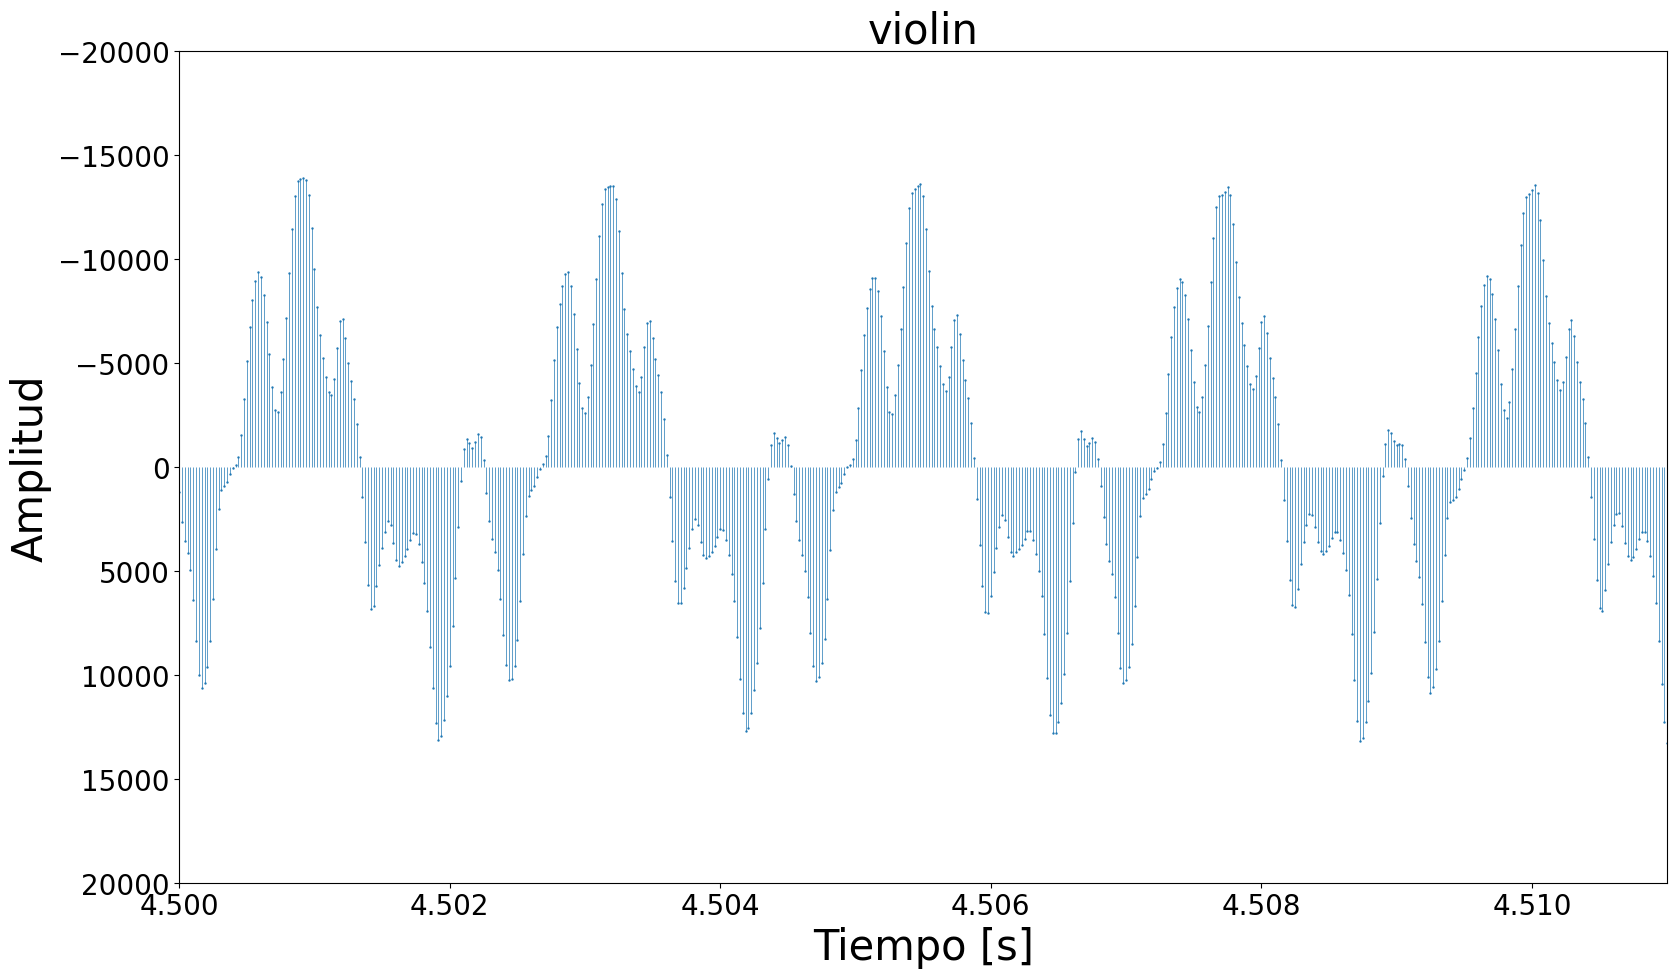

In [67]:
fsg, datag = wavfile.read("guitarra.wav")
fsa, dataa = wavfile.read("piano.wav")
fsv, datav = wavfile.read("violin.wav")

# Crear eje temporal
tg = np.arange(len(datag)) / fsg
ta = np.arange(len(dataa)) / fsa
tv = np.arange(len(datav)) / fsv

# Graficar
plt.figure(figsize=(19.20, 10.80))
plt.scatter(tg, datag[:, 0], s=0.5)
plt.vlines(tg, 0, datag[:, 0], color='C0', linewidth=0.5)
#plt.plot(tg, datag[:, 0])
plt.title("guitarra", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)
plt.xlim(4.5,4.511)

plt.savefig("guitarra")

plt.show()

plt.figure(figsize=(19.20, 10.80))
plt.scatter(ta, dataa[:, 0], s=0.5)
plt.vlines(ta, 0, dataa[:, 0], color='C0', linewidth=0.5)
#plt.plot(ta,dataa[:, 0])
plt.title("piano", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)
plt.xlim(1.301,1.312)
plt.ylim(-3500,3500)

plt.savefig("piano")

plt.show()

plt.figure(figsize=(19.20, 10.80))
plt.scatter(tv, datav[:, 0], s=0.5, color='C0')
plt.vlines(tv, 0, datav[:, 0], color='C0', linewidth=0.5)
#plt.plot(tv,datav[:, 0])
plt.title("violin", fontsize=30)
plt.xlabel("Tiempo [s]", fontsize=30)
plt.ylabel("Amplitud", fontsize=30)
plt.ylim(20000,-20000)

plt.xlim(4.5,4.511)


plt.savefig("violin")

plt.show()